In [1]:
# IMPORTING LIBRARIES

import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices
import pandas as pd # A common package for viewing tabular data

from sklearn.preprocessing import StandardScaler, MinMaxScaler # We will be using the inbuilt sclaing functions sklearn provides
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
from sklearn.preprocessing import PolynomialFeatures # A preprocessing function allowing us to include polynomial features into our model

from google.colab import files # We will be importing a csv file I have provided for one section.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # We will be using these to encode categorical features

from sklearn.impute import SimpleImputer # Performs basic imputations when doing preprocessing
# pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.filterwarnings('ignore')

# UPLOADING CSV FILES
#uploaded = files.upload()  

# Save it to a pandas dataframe
training_data = pd.read_csv('housing_coursework_train.csv') 
testing_data = pd.read_csv('housing_coursework_test.csv')

In [2]:
# 1) IMPUTATION NEEDED

# Checking for null values in data
print(training_data.isnull().sum(), "\n")
# Percentage of null values
print((training_data.isnull().sum() / len(training_data.index)) * 100, "\n")

# Training
# total_bedrooms  1 %

# Checking for null values in data
print(testing_data.isnull().sum(), "\n")
# Percentage of null values
print((testing_data.isnull().sum() / len(testing_data.index)) * 100, "\n")

# Testing
# total_bedrooms 0.454545 %

# DISTRIBUTING FEATURES AND OUTPUT
features = training_data.columns.tolist()
features.remove('median_house_value')

# TRAINING DATA
X_train_raw = training_data[features]
y_train = training_data['median_house_value']

print("Total Features: ", features)
print("X train shape: ", X_train_raw.shape, "\nY train shape: ", y_train.shape)
# display(X_train_raw.head(), y_train_raw.head())

# TESTING DATA
X_test_raw = testing_data[features]
y_test = testing_data['median_house_value']

print("X test shape: ", X_test_raw.shape, "\nY test shape: ", y_test.shape)
# display(X_test_raw.head(), y_test_raw.head())

################################################################################
column_to_drop = ['No.']

# TRAINING DROP
X_train_raw = X_train_raw.drop(columns=column_to_drop) # Remove the No. column using '.drop'
# TESTING DROP
X_test_raw = X_test_raw.drop(columns=column_to_drop) # Remove the No. column using '.drop'
# display("X Train ", X_train_raw.head(), "X Test ", X_test_raw.head())

# TRAINING
display(X_train_raw.select_dtypes(include=np.number).head(10)) # display numeric colmuns
display(X_train_raw.select_dtypes(exclude=np.number).head(10)) # display non-numeric colmuns

# TESTING
display(X_test_raw.select_dtypes(include=np.number).head(10)) # display numeric colmuns
display(X_test_raw.select_dtypes(exclude=np.number).head(10)) # display non-numeric colmuns

# NUMERICAL DATA
display(X_train_raw.select_dtypes(include=np.number).describe())
display(X_test_raw.select_dtypes(include=np.number).describe())

# CATEGORICAL DATA
display(X_train_raw.select_dtypes(exclude=np.number).describe())
display(X_test_raw.select_dtypes(exclude=np.number).describe())

# TRAINING
print(pd.unique(X_train_raw['ocean_proximity']))
# TESTING
print(pd.unique(X_test_raw['ocean_proximity']))

#------------------------------------------------------------------------------#

No.                   0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        8
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64 

No.                   0.0
longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        1.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64 

No.                   0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        1
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64 

No.                   0.000000
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.21,37.83,34,5065,788.0,1627,766,6.8976
1,-122.22,37.77,52,391,128.0,520,138,1.6471
2,-122.23,37.79,30,610,145.0,425,140,1.6198
3,-122.20,37.78,52,2300,443.0,1225,423,3.5398
4,-122.19,37.79,50,954,217.0,546,201,2.6667
5,-122.19,37.76,26,1293,297.0,984,303,1.9479
6,-122.17,37.74,43,818,193.0,494,179,2.4776
7,-122.18,37.75,46,941,218.0,621,195,1.3250
8,-122.16,37.75,38,2457,624.0,1516,482,1.5625
9,-122.14,37.75,33,1334,200.0,579,202,6.8323


,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.26,37.93,33,2109,531.0,2248,588,1.4583
1,-121.28,37.94,40,2806,685.0,2268,635,1.8814
2,-121.24,37.98,33,450,123.0,236,103,1.1964
3,-121.23,37.96,44,2204,473.0,1277,435,1.5539
4,-121.33,38.00,32,4474,929.0,2177,884,3.2889
5,-121.32,38.04,30,249,44.0,167,45,4.5000
6,-121.30,38.03,10,1409,248.0,782,222,4.0227
7,-121.29,38.02,12,2006,426.0,1849,396,2.5437
8,-121.18,37.99,31,2450,559.0,1459,478,2.4674
9,-121.28,38.14,38,2803,500.0,1223,509,4.1190


,ocean_proximity
0,INLAND
1,INLAND
2,INLAND
3,INLAND
4,INLAND
5,INLAND
6,INLAND
7,INLAND
8,INLAND
9,INLAND


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,800.000000,800.000000,800.000000,800.000000,792.000000,800.000000,800.00000,800.000000
mean,-119.083387,35.204400,28.416250,2734.027500,564.393939,1484.078750,519.64500,3.888588
std,1.872222,2.045544,12.482297,2265.834123,441.033737,1140.365473,395.28818,1.904613
min,-124.190000,32.560000,2.000000,45.000000,11.000000,34.000000,10.00000,0.873800
25%,-120.887500,33.830000,18.000000,1482.000000,310.750000,828.750000,290.00000,2.589775
50%,-118.310000,34.100000,29.000000,2188.000000,448.000000,1202.500000,423.00000,3.662000
75%,-117.890000,37.572500,37.000000,3239.500000,673.250000,1800.750000,628.00000,4.760025
max,-115.410000,40.730000,52.000000,27700.000000,4386.000000,15037.000000,4072.00000,15.000100


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,220.000000,220.000000,220.000000,220.000000,219.000000,220.000000,220.000000,220.000000
mean,-121.304409,37.302273,24.740909,2728.477273,528.310502,1441.804545,500.959091,4.198558
std,1.183221,1.625938,11.230713,1771.953215,350.494466,1028.550060,331.063532,2.127710
min,-123.490000,34.160000,2.000000,19.000000,19.000000,131.000000,9.000000,0.536000
25%,-122.070000,36.550000,16.000000,1483.750000,271.000000,755.250000,273.000000,2.874025
50%,-121.790000,37.400000,24.000000,2384.000000,461.000000,1217.500000,433.500000,3.880550
75%,-120.657500,38.252500,33.000000,3312.250000,667.500000,1864.750000,621.250000,5.201600
max,-118.670000,41.780000,52.000000,9374.000000,2124.000000,8793.000000,2086.000000,15.000100


,ocean_proximity
count,800
unique,4
top,<1H OCEAN
freq,371


,ocean_proximity
count,220
unique,4
top,<1H OCEAN
freq,95


['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN']
['INLAND' '<1H OCEAN' 'NEAR OCEAN' 'NEAR BAY']


#***AUTOMATIC PRE-PROCESSING WITH POLY DEGREE***




In [3]:
def auto_preprocess(poly_degree):
  
  poly = PolynomialFeatures(degree=poly_degree)
  scaler = StandardScaler()
  
  # Training Data
  X_train_num = X_train_raw.select_dtypes(include=np.number)
  X_train_cat = X_train_raw.select_dtypes(exclude=np.number)

  # Testing Data
  X_test_num = X_test_raw.select_dtypes(include=np.number)
  X_test_cat = X_test_raw.select_dtypes(exclude=np.number)

  # Create our imputer objects
  numeric_imputer = SimpleImputer(strategy='mean')
  categorical_imputer = SimpleImputer(strategy='most_frequent')

  # Fit the imputers on the training data
  numeric_imputer.fit(X_train_num)
  categorical_imputer.fit(X_train_cat)

  X_train_num_imp = numeric_imputer.transform(X_train_num)
  X_train_cat_imp = categorical_imputer.transform(X_train_cat)

  X_test_num_imp = numeric_imputer.transform(X_test_num)
  X_test_cat_imp = categorical_imputer.transform(X_test_cat)

  # TRAINING
  X_train_num_imp_poly = poly.fit_transform(X_train_num_imp)
  X_train_num_imp_poly_sca = scaler.fit_transform(X_train_num_imp_poly)

  # TESTING
  X_test_num_imp_poly = poly.transform(X_test_num_imp)
  X_test_num_imp_poly_sca = scaler.transform(X_test_num_imp_poly)

  # create the encoder object
  encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
  # Fit encoder on the training data
  encoder.fit(X_train_cat_imp)

  # Transform the test and train data
  X_train_onehot = encoder.transform(X_train_cat_imp)
  X_test_onehot = encoder.transform(X_test_cat_imp)

  X_train = np.concatenate([X_train_num_imp_poly_sca, X_train_onehot], axis=1)
  X_test = np.concatenate([X_test_num_imp_poly_sca, X_test_onehot], axis=1)

  # print("train: ", X_train_num_imp_poly_sca.shape, "\nonehot: ", X_train_onehot.shape)

  return X_train, X_test


#**ANALYSING DEGREE USING POLY FEATS.**

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def polynom(max_degree, degrees, model_):

  mse_train_array = np.full([max_degree + 1], np.nan)
  mse_test_array = np.full([max_degree + 1], np.nan)

  r2_train_array = np.full([max_degree + 1], np.nan)
  r2_test_array = np.full([max_degree + 1], np.nan)

  for degree in degrees:

    # Initialise
    model = model_
    X_train, X_test = auto_preprocess(degree)
    
    model.fit(X_train, y_train)
    # Train
    y_pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Test  
    y_pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Store MSE for this degree value
    mse_train_array[degree] = mse_train
    mse_test_array[degree] = mse_test

    # Store R2 for this degree values
    r2_train_array[degree] = r2_train
    r2_test_array[degree] = r2_test

  return mse_train_array, mse_test_array, r2_train_array, r2_test_array


#**1. LINEAR REGRESSION**

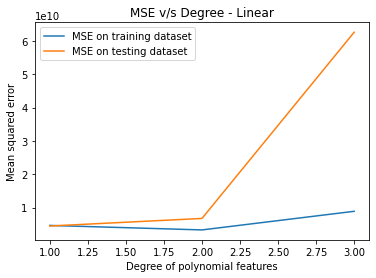


The best degree of polynomials for MSE: 1 
MSE:  4458512790.470452 



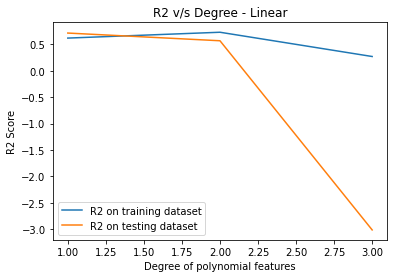


The best degree of polynomials for R2: 1 
R2 Score:  0.7141423210666689 

#########################################################################

Training - 
MSE: 4633899890.8960 
R2 score: 0.6188

Testing - 
MSE: 4458512790.4705 
R2 score: 0.7141
[     0.         -65303.53085026 -64875.96687365  17550.2637655
 -12676.04556305  31523.75434459 -48299.61887234  35076.02511611
  70206.82529174  18768.90914045 -19184.9626944  -13431.36896316
  13847.42251711]
4458512790.470452


In [5]:
import matplotlib.pyplot as plt

max_degree = 3
degrees = range(1, max_degree+1)

mse_train_array, mse_test_array, r2_train_array, r2_test_array = polynom(max_degree, degrees, LinearRegression())
    
plt.plot(degrees, mse_train_array[1:], label='MSE on training dataset')
plt.plot(degrees, mse_test_array[1:], label='MSE on testing dataset')
plt.xlabel('Degree of polynomial features')
plt.ylabel('Mean squared error')
plt.title('MSE v/s Degree - Linear')
plt.legend()
plt.show()

best_degree = np.nanargmin(mse_test_array) # Finds the smallest Testing MSE in the array (ignoring any NaN values).
print('\nThe best degree of polynomials for MSE:', best_degree,
      "\nMSE: ", mse_test_array[best_degree], "\n")

plt.plot(degrees, r2_train_array[1:], label='R2 on training dataset')
plt.plot(degrees, r2_test_array[1:], label='R2 on testing dataset')
plt.xlabel('Degree of polynomial features')
plt.ylabel('R2 Score')
plt.title('R2 v/s Degree - Linear')
plt.legend()
plt.show()

best_degree = np.nanargmax(r2_test_array) # Finds the smallest Testing R2 in the array (ignoring any NaN values).
print('\nThe best degree of polynomials for R2:', best_degree,
      "\nR2 Score: ", r2_test_array[best_degree], "\n")

X_train, X_test = auto_preprocess(best_degree)

################################################################################
# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

# Create linear regression object
obj = LinearRegression()

# Train the model using the training sets
obj.fit(X_train, y_train)

# Training 
y_pred_train = obj.predict(X_train)

# Testing
y_pred_test = obj.predict(X_test)

# The mean squared error loss and R2 for the test and train data
print("#########################################################################\n")
print('Training - \nMSE: {:.4f} \nR2 score: {:.4f}'.format(mean_squared_error(y_train, y_pred_train),r2_score(y_train, y_pred_train)))
print('\nTesting - \nMSE: {:.4f} \nR2 score: {:.4f}'.format(mean_squared_error(y_test, y_pred_test),r2_score(y_test, y_pred_test)))

# Train - MSE: 4633899890.8960  R2 score: 0.6188
# Test - MSE: 4458512790.4705  R2 score: 0.7141

print(obj.coef_)

check = pd.DataFrame({"Ground Truth":testing_data['median_house_value'], "Prediction":y_pred_test})
check
print(mean_squared_error(y_test, y_pred_test))
#------------------------------------------------------------------------------#

#**ANALYSING ALPHA HYPER PARAM.**

In [6]:
def alp(alpha_range, degree, model_):
  alpha_indices = np.arange(alpha_range) 
  
  # 1. For ridge regression [10 ** -1, ....., 10 ** -500]
  #alphas = 10.0 ** (-alpha_indices) 

  # 2. FOr ridge and lasso regression
  num_range =[]
  [num_range.append(float(y)) for y in range(1, 1000, 2)]
  alphas = np.array(num_range)
  
  mse_train_array = np.full([len(alphas)], np.nan) 
  mse_test_array = np.full([len(alphas)], np.nan)

  r2_train_array = np.full([len(alphas)], np.nan) 
  r2_test_array = np.full([len(alphas)], np.nan)
  
  X_train, X_test = auto_preprocess(degree)

  # Loop to test alpha values
  for alpha_index, alpha in zip(alpha_indices, alphas):
    # training
    model = model_(alpha=alpha) 
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)

    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Testing
    y_pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    # Store MSEs for this iteration
    mse_train_array[alpha_index] = mse_train
    mse_test_array[alpha_index] = mse_test

    r2_train_array[alpha_index] = r2_train
    r2_test_array[alpha_index] = r2_test

    print(f'alpha: {alpha}, Testing mean squared error: {mse_test}. R2 Score: {r2_test}')

  return mse_train_array, mse_test_array, r2_train_array, r2_test_array, alphas
#------------------------------------------------------------------------------#

# **2. LASSO REGRESSION**


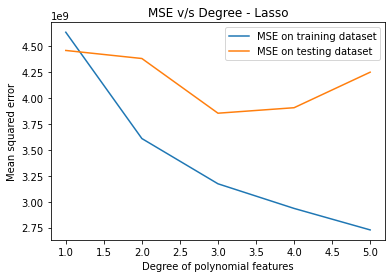


The best degree of polynomials for MSE: 3 
MSE:  3853119415.412712 



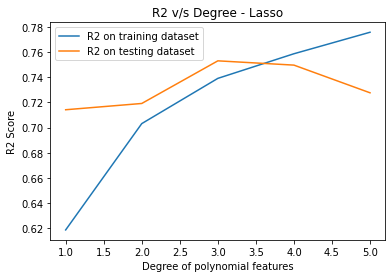


The best degree of polynomials for R2: 3 
R2 Score:  0.7529571351467157 

alpha: 1.0, Testing mean squared error: 3853119415.412712. R2 Score: 0.7529571351467157
alpha: 3.0, Testing mean squared error: 3848626563.649573. R2 Score: 0.7532451944698935
alpha: 5.0, Testing mean squared error: 3845770993.8762875. R2 Score: 0.7534282794100484
alpha: 7.0, Testing mean squared error: 3846630224.953134. R2 Score: 0.7533731897842387
alpha: 9.0, Testing mean squared error: 3852974411.603112. R2 Score: 0.7529664320702407
alpha: 11.0, Testing mean squared error: 3860020868.434561. R2 Score: 0.7525146482828651
alpha: 13.0, Testing mean squared error: 3872606932.5179567. R2 Score: 0.7517076924133034
alpha: 15.0, Testing mean squared error: 3890174812.8522563. R2 Score: 0.7505813272480234
alpha: 17.0, Testing mean squared error: 3907652601.821849. R2 Score: 0.7494607382932461
alpha: 19.0, Testing mean squared error: 3911052900.024078. R2 Score: 0.7492427280738188
alpha: 21.0, Testing mean squared err

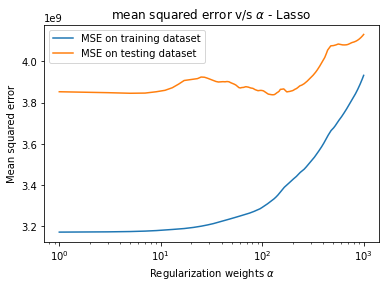


The best alpha: 127.0


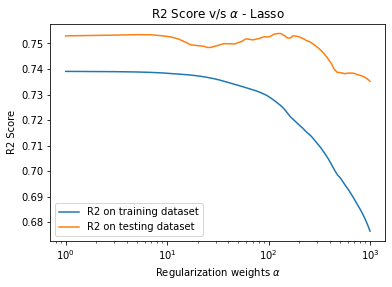


The best alpha: 127.0
#########################################################################

Training - 
MSE: 3328653234.0732 
R2 score: 0.7262

Testing - 
MSE: 3838330718.1425 
R2 score: 0.7539


,Ground Truth,Prediction
0,53000,58014.819079
1,57700,75939.439200
2,80400,68777.560484
3,59200,62398.717280
4,98900,171457.503528
...,...,...
215,225000,93078.119709
216,193800,105185.566315
217,98400,129002.447338
218,96300,124393.688723


In [7]:
################################################################################
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')
# LASSO MODEL DEGREE ANALYSIS

max_degree = 5
degrees = range(1, max_degree+1)
mse_train_array, mse_test_array, r2_train_array, r2_test_array = polynom(max_degree, degrees, Lasso())

plt.plot(degrees, mse_train_array[1:], label='MSE on training dataset')
plt.plot(degrees, mse_test_array[1:], label='MSE on testing dataset')
plt.xlabel('Degree of polynomial features')
plt.ylabel('Mean squared error')
plt.title('MSE v/s Degree - Lasso')
plt.legend()
plt.show()

best_degree = np.nanargmin(mse_test_array) # Finds the smallest VALIDATION MSE in the array (ignoring any NaN values).
print('\nThe best degree of polynomials for MSE:', best_degree,
      "\nMSE: ", mse_test_array[best_degree], "\n")

plt.plot(degrees, r2_train_array[1:], label='R2 on training dataset')
plt.plot(degrees, r2_test_array[1:], label='R2 on testing dataset')
plt.xlabel('Degree of polynomial features')
plt.ylabel('R2 Score')
plt.title('R2 v/s Degree - Lasso')
plt.legend()
plt.show()

best_degree = np.nanargmax(r2_test_array) # Finds the smallest VALIDATION R2 in the array (ignoring any NaN values).
print('\nThe best degree of polynomials for R2:', best_degree,
      "\nR2 Score: ", r2_test_array[best_degree], "\n")

################################################################################
# LASSO MODEL ALPHA ANALYSIS

lasso_mse_train_array, lasso_mse_test_array, lasso_r2_train_array, lasso_r2_test_array, alphas = alp(500, best_degree, Lasso)

print()
# Plot our graph of MSE for training and testing 
plt.plot(alphas, lasso_mse_train_array, label='MSE on training dataset')
plt.plot(alphas, lasso_mse_test_array, label='MSE on testing dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'mean squared error v/s $\alpha$ - Lasso')
plt.xscale('log')
plt.legend()
plt.show()

# Select our best performing alpha (lowest MSE)
best_alpha_index = np.argmin(lasso_mse_test_array)
best_alpha = alphas[best_alpha_index]
print('\nThe best alpha:', best_alpha)

# Plot our graph of MSE for training and testing 
plt.plot(alphas, lasso_r2_train_array, label='R2 on training dataset')
plt.plot(alphas, lasso_r2_test_array, label='R2 on testing dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('R2 Score')
plt.title(r'R2 Score v/s $\alpha$ - Lasso')
plt.xscale('log')
plt.legend()
plt.show()

# Select our best performing alpha (lowest MSE)
best_alpha_index = np.argmax(lasso_r2_test_array)
best_alpha = alphas[best_alpha_index]
print('\nThe best alpha:', best_alpha)

################################################################################

X_train, X_test = auto_preprocess(best_degree)

################################################################################
# LASSO MODEL

model = Lasso(alpha=best_alpha, max_iter=1000,) 
model.fit(X_train, y_train)  

# Training 
y_pred_train = model.predict(X_train)

# Testing
y_pred_test = model.predict(X_test)

# The mean squared error loss and R2 for the test and train data
print("#########################################################################\n")
print('Training - \nMSE: {:.4f} \nR2 score: {:.4f}'.format(mean_squared_error(y_train, y_pred_train),r2_score(y_train, y_pred_train)))
print('\nTesting - \nMSE: {:.4f} \nR2 score: {:.4f}'.format(mean_squared_error(y_test, y_pred_test),r2_score(y_test, y_pred_test)))

check = pd.DataFrame({"Ground Truth":testing_data['median_house_value'], "Prediction":y_pred_test})
check
#------------------------------------------------------------------------------#

#**3. RIDGE REGRESSION**



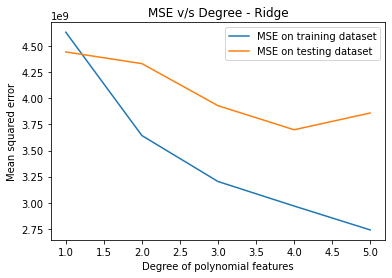


The best degree of polynomials for MSE: 4 
MSE:  3699324957.795387 



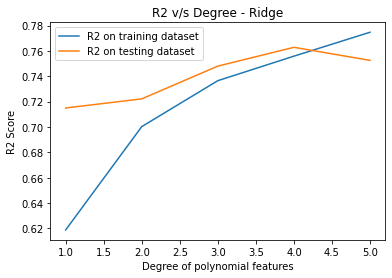


The best degree of polynomials for R2: 4 
R2 Score:  0.7628176713284813 

alpha: 1.0, Testing mean squared error: 3699324957.795387. R2 Score: 0.7628176713284813
alpha: 3.0, Testing mean squared error: 3881841752.037496. R2 Score: 0.7511156016876995
alpha: 5.0, Testing mean squared error: 3956753735.850959. R2 Score: 0.7463126176381801
alpha: 7.0, Testing mean squared error: 3985295278.0720406. R2 Score: 0.7444826758176846
alpha: 9.0, Testing mean squared error: 3995433318.7767243. R2 Score: 0.7438326750391814
alpha: 11.0, Testing mean squared error: 3997595859.95187. R2 Score: 0.7436940236480165
alpha: 13.0, Testing mean squared error: 3996191955.5173144. R2 Score: 0.7437840350222048
alpha: 15.0, Testing mean squared error: 3993265204.90952. R2 Score: 0.7439716837236617
alpha: 17.0, Testing mean squared error: 3989820539.511833. R2 Score: 0.7441925385471333
alpha: 19.0, Testing mean squared error: 3986368141.5943003. R2 Score: 0.7444138891413425
alpha: 21.0, Testing mean squared erro

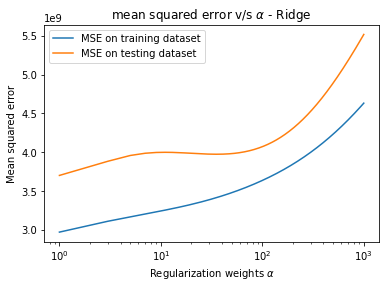


The best alpha: 1.0


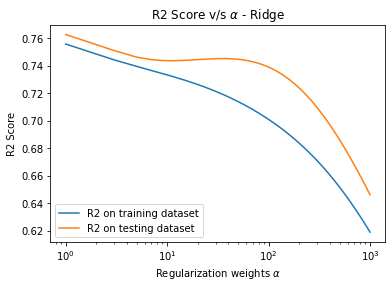


The best alpha: 1.0
#########################################################################

Training - 
MSE: 2968237297.0834 
R2 score: 0.7558

Testing - 
MSE: 3699324957.7954 
R2 score: 0.7628


,Ground Truth,Prediction
0,53000,77640.550052
1,57700,84800.985946
2,80400,83821.899093
3,59200,54938.228645
4,98900,158906.995736
...,...,...
215,225000,91431.638232
216,193800,111398.922310
217,98400,128573.639172
218,96300,122169.252514


In [8]:
################################################################################
from sklearn.linear_model import Ridge
# RIDGE MODEL DEGREE ANALYSIS

max_degree = 5
degrees = range(1, max_degree+1)
mse_train_array, mse_test_array, r2_train_array, r2_test_array = polynom(max_degree, degrees, Ridge())

plt.plot(degrees, mse_train_array[1:], label='MSE on training dataset')
plt.plot(degrees, mse_test_array[1:], label='MSE on testing dataset')
plt.xlabel('Degree of polynomial features')
plt.ylabel('Mean squared error')
plt.title('MSE v/s Degree - Ridge')
plt.legend()
plt.show()

best_degree = np.nanargmin(mse_test_array) # Finds the smallest VALIDATION MSE in the array (ignoring any NaN values).
print('\nThe best degree of polynomials for MSE:', best_degree,
      "\nMSE: ", mse_test_array[best_degree], "\n")

plt.plot(degrees, r2_train_array[1:], label='R2 on training dataset')
plt.plot(degrees, r2_test_array[1:], label='R2 on testing dataset')
plt.xlabel('Degree of polynomial features')
plt.ylabel('R2 Score')
plt.title('R2 v/s Degree - Ridge')
plt.legend()
plt.show()

best_degree = np.nanargmax(r2_test_array) # Finds the smallest VALIDATION R2 in the array (ignoring any NaN values).
print('\nThe best degree of polynomials for R2:', best_degree,
      "\nR2 Score: ", r2_test_array[best_degree], "\n")

################################################################################
# RIDGE MODEL ALPHA ANALYSIS

ridge_mse_train_array, ridge_mse_test_array, ridge_r2_train_array, ridge_r2_test_array, alphas = alp(500, best_degree, Ridge)

print()
# Plot our graph of MSE for training and testing 
plt.plot(alphas, ridge_mse_train_array, label='MSE on training dataset')
plt.plot(alphas, ridge_mse_test_array, label='MSE on testing dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'mean squared error v/s $\alpha$ - Ridge')
plt.xscale('log')
plt.legend()
plt.show()

# Select our best performing alpha (lowest MSE)
best_alpha_index = np.argmin(ridge_mse_test_array)
best_alpha = alphas[best_alpha_index]
print('\nThe best alpha:', best_alpha)

# Plot our graph of MSE for training and testing 
plt.plot(alphas, ridge_r2_train_array, label='R2 on training dataset')
plt.plot(alphas, ridge_r2_test_array, label='R2 on testing dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('R2 Score')
plt.title(r'R2 Score v/s $\alpha$ - Ridge')
plt.xscale('log')
plt.legend()
plt.show()

# Select our best performing alpha (lowest MSE)
best_alpha_index = np.argmax(ridge_r2_test_array)
best_alpha = alphas[best_alpha_index]
print('\nThe best alpha:', best_alpha)

################################################################################

X_train, X_test = auto_preprocess(best_degree)

################################################################################
# LASSO MODEL

model = Ridge(alpha=best_alpha, max_iter=1000,) 
model.fit(X_train, y_train)  

# Training 
y_pred_train = model.predict(X_train)

# Testing
y_pred_test = model.predict(X_test)

# The mean squared error loss and R2 for the test and train data
print("#########################################################################\n")
print('Training - \nMSE: {:.4f} \nR2 score: {:.4f}'.format(mean_squared_error(y_train, y_pred_train),r2_score(y_train, y_pred_train)))
print('\nTesting - \nMSE: {:.4f} \nR2 score: {:.4f}'.format(mean_squared_error(y_test, y_pred_test),r2_score(y_test, y_pred_test)))

# Training - MSE: 2968237297.0835 R2 score: 0.7558
# Testing - MSE: 3699324957.7948 R2 score: 0.7628

check = pd.DataFrame({"Ground Truth":testing_data['median_house_value'], "Prediction":y_pred_test})
check
#------------------------------------------------------------------------------#

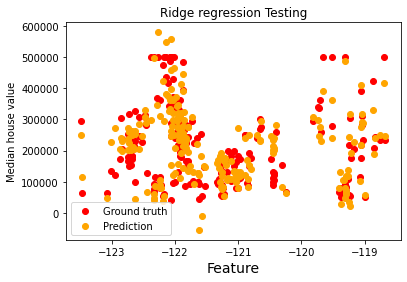

In [9]:
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Median house value')
plt.title('Ridge regression Testing')
counter = [x for x in range(len(testing_data))]
plt.scatter(testing_data['longitude'], check['Ground Truth'], color='red', label='Ground truth')
plt.scatter(testing_data['longitude'], check['Prediction'], color='orange', label='Prediction')
plt.legend()
plt.show()
#------------------------------------------------------------------------------#